<h3>Training Sentiment Analysis Model using Movies Review</h3>
Source: <a href="https://www.kaggle.com/code/gauravkumar462/imdb-moview-review-sentiment-analysis">Kaggle dataset<a/>

In [1]:
import nltk
import random
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt 

from statistics import mode
from scipy import stats as s
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from nltk.classify import ClassifierI
from nltk.tokenize import word_tokenize

<h5>Loading IMDB Data into Dataframe</h5>

In [2]:
file_path = os.getcwd() + "/"
data_df = pd.read_csv(file_path + "IMDB Dataset.csv")
data_df = data_df[0:10000]  # take only 5000 rows

In [3]:
data_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data_df.describe()

,review,sentiment
count,10000,10000
unique,9983,2
top,I want very much to believe that the above quo...,positive
freq,2,5028


<h5>Tokenizing the review</h5>

In [5]:
all_words_list = []
documents = []

""" 
J is adject
R is adverb
V is verb
"""
allowed_word_types = ["J"]

for index, row in data_df.iterrows():
    if row.sentiment == "positive":
        documents.append( (row.review, "pos") )
    else:
        documents.append( (row.review, "neg") )
    words = word_tokenize(row.review)
    pos = nltk.pos_tag(words)
    for w in pos:
        if w[0] != '<' and w[1][0] in allowed_word_types:
            all_words_list.append(w[0].lower())

In [6]:
with open(file_path + "pickled_algorithms/documents.pickle","wb") as document_pickle_file:
    pickle.dump(documents, document_pickle_file)

<h5>Extracting Frequent words in the dataset to generate feature for ML Algorithm</h5>

In [7]:
all_words = nltk.FreqDist(all_words_list)
word_features = list(all_words.keys())[:5500]

In [8]:
with open(file_path + "pickled_algorithms/word_features5k.pickle","wb") as word_feature_file:
    pickle.dump(word_features, word_feature_file)

In [9]:
all_words.most_common(10)
# all_words['good']

[('good', 5699),
 ('other', 3613),
 ('great', 3380),
 ('bad', 3351),
 ('more', 2714),
 ('first', 2604),
 ('many', 2562),
 ('little', 2333),
 ('much', 2256),
 ('best', 2162)]

<h5>Generate feature set from review</h5>

In [10]:
def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

featuresets = [(find_features(rev), category) for (rev, category) in documents]

<h5>Shuffuling the dataset and split train-test data for training</h5>

In [11]:
random.shuffle(featuresets)

testing_set_number = int(len(data_df)*0.66)
testing_set = featuresets[testing_set_number:]
training_set = featuresets[:testing_set_number]

<h4>Training Begins...</h4>

In [12]:
classifier = nltk.NaiveBayesClassifier.train(training_set)
nbc_accuracy = (nltk.classify.accuracy(classifier, testing_set))*100
print("Original Naive Bayes Algo accuracy percent:", nbc_accuracy)
# classifier.show_most_informative_features(15)


MNB_classifier = SklearnClassifier(MultinomialNB())
MNB_classifier.train(training_set)
mnb_accuracy = (nltk.classify.accuracy(MNB_classifier, testing_set))*100
print("MNB_classifier accuracy percent:", mnb_accuracy)


BernoulliNB_classifier = SklearnClassifier(BernoulliNB())
BernoulliNB_classifier.train(training_set)
bnb_accuracy = (nltk.classify.accuracy(BernoulliNB_classifier, testing_set))*100
print("BernoulliNB_classifier accuracy percent:", bnb_accuracy)


LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(training_set)
lr_accuracy = (nltk.classify.accuracy(LogisticRegression_classifier, testing_set))*100
print("LogisticRegression_classifier accuracy percent:", lr_accuracy)


LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(training_set)
lsvc_accuracy = (nltk.classify.accuracy(LinearSVC_classifier, testing_set))*100
print("LinearSVC_classifier accuracy percent:", lsvc_accuracy)


NuSVC_classifier = SklearnClassifier(NuSVC())
NuSVC_classifier.train(training_set)
nsvc_accuracy = (nltk.classify.accuracy(NuSVC_classifier, testing_set))*100
print("NuSVC_classifier accuracy percent:", nsvc_accuracy)


SGDC_classifier = SklearnClassifier(SGDClassifier())
SGDC_classifier.train(training_set)
sgdc_accuracy = nltk.classify.accuracy(SGDC_classifier, testing_set)*100
print("SGDClassifier accuracy percent:", sgdc_accuracy)

Original Naive Bayes Algo accuracy percent: 83.88235294117648
MNB_classifier accuracy percent: 84.38235294117648
BernoulliNB_classifier accuracy percent: 83.91176470588235
LogisticRegression_classifier accuracy percent: 82.02941176470588
LinearSVC_classifier accuracy percent: 79.20588235294119
NuSVC_classifier accuracy percent: 83.61764705882354
SGDClassifier accuracy percent: 79.79411764705883


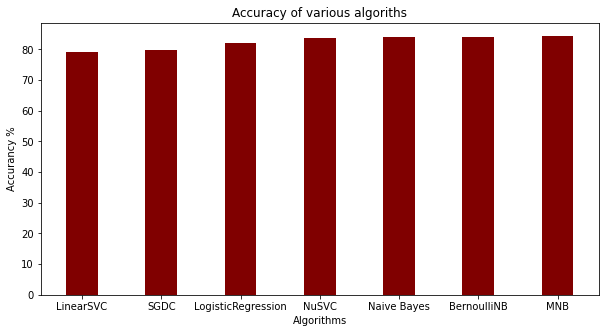

In [13]:
accuracy_data = {
    'Naive Bayes': nbc_accuracy,
    'MNB': mnb_accuracy,
    'BernoulliNB': bnb_accuracy,
    'LogisticRegression': lr_accuracy,
    'LinearSVC': lsvc_accuracy,
    'NuSVC': nsvc_accuracy,
    'SGDC': sgdc_accuracy,
}

accuracy_data = dict(sorted(accuracy_data.items(), key=lambda x:x[1]))

algorithms = list(accuracy_data.keys())
accuracy = list(accuracy_data.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(algorithms, accuracy, color ='maroon', width = 0.4)
 
plt.xlabel("Algorithms")
plt.ylabel("Accurancy %")
plt.title("Accuracy of various algoriths")
plt.show()

In [14]:
with open(file_path + "pickled_algorithms/originalnaivebayes5k.pickle","wb") as save_classifier:
    pickle.dump(classifier, save_classifier)

with open(file_path + "pickled_algorithms/MNB_classifier5k.pickle","wb") as save_classifier:
    pickle.dump(MNB_classifier, save_classifier)

with open(file_path + "pickled_algorithms/BernoulliNB_classifier5k.pickle","wb") as save_classifier:
    pickle.dump(BernoulliNB_classifier, save_classifier)

with open(file_path + "pickled_algorithms/LogisticRegression_classifier5k.pickle","wb") as save_classifier:
    pickle.dump(LogisticRegression_classifier, save_classifier)

with open(file_path + "pickled_algorithms/LinearSVC_classifier5k.pickle","wb") as save_classifier:
    pickle.dump(LinearSVC_classifier, save_classifier)

with open(file_path + "pickled_algorithms/SGDC_classifier5k.pickle","wb") as save_classifier:
    pickle.dump(SGDC_classifier, save_classifier)

In [15]:
class VoteClassifier(ClassifierI):
    def __init__(self, *classifiers):
        self._classifiers = classifiers

    def mode_votes(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        try:
            mode_votes = mode(votes)
        except:
            mode_votes = s.mode(votes).mode[0]
        
        return mode_votes

    def classify(self, features):
        return self.mode_votes(features)
    
    def confidence(self, features):
        votes = []
        for c in self._classifiers:
            v = c.classify(features)
            votes.append(v)

        choice_votes = votes.count(self.mode_votes(features))
        conf = choice_votes / len(votes)
        return conf

voted_classifier = VoteClassifier(classifier,
                                  NuSVC_classifier,
                                  LinearSVC_classifier,
                                  SGDC_classifier,
                                  MNB_classifier,
                                  BernoulliNB_classifier,
                                  LogisticRegression_classifier)


In [16]:
print("voted_classifier accuracy percent:", (nltk.classify.accuracy(voted_classifier, testing_set))*100)

print("Classification:", voted_classifier.classify(testing_set[0][0]), "Confidence %:",voted_classifier.confidence(testing_set[0][0])*100)
print("Classification:", voted_classifier.classify(testing_set[1][0]), "Confidence %:",voted_classifier.confidence(testing_set[1][0])*100)
print("Classification:", voted_classifier.classify(testing_set[2][0]), "Confidence %:",voted_classifier.confidence(testing_set[2][0])*100)
print("Classification:", voted_classifier.classify(testing_set[3][0]), "Confidence %:",voted_classifier.confidence(testing_set[3][0])*100)
print("Classification:", voted_classifier.classify(testing_set[4][0]), "Confidence %:",voted_classifier.confidence(testing_set[4][0])*100)
print("Classification:", voted_classifier.classify(testing_set[5][0]), "Confidence %:",voted_classifier.confidence(testing_set[5][0])*100)

voted_classifier accuracy percent: 83.6470588235294
Classification: neg Confidence %: 100.0
Classification: neg Confidence %: 71.42857142857143
Classification: pos Confidence %: 100.0
Classification: neg Confidence %: 100.0
Classification: pos Confidence %: 100.0
Classification: neg Confidence %: 85.71428571428571


In [17]:
voted_classifier.classify(find_features('Lakpa is handsome and briliant man.'))

'pos'